A seguir utilizaremos alguns métodos de limpeza de dados, análise exploratória e explanatória em um dataset histórico referente as olimpíadas, fornecido pelo Kaggle.
* https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

Bibliotecas utilizadas:

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando o dataset e descartando dados duplicados:

In [191]:
data = pd.read_csv('olimp.csv')
data.drop_duplicates()

print(data.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

Visualizando o número de colunas e linhas:

In [192]:
print(f'O dataset utilizado tem {data.shape[1]} colunas (incluíndo ID) e {data.shape[0]} linhas.')

O dataset utilizado tem 15 colunas (incluíndo ID) e 271116 linhas.


In [193]:
# Podemos armazenar as variáveis (excluíndo ID) em uma lista:

var = data.iloc[:,1:].columns.to_list()
print(var)

['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


Visualizando número de dados não-nulos e os respectivos formatos dos dados:

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Visualizando parâmetros estatísticos das variáveis numéricas para a identificação de possíveis outliers:

In [195]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Podemos observar entradas no dataset de participantes com idade mínima de 10 anos e máxima de 97 anos:

In [196]:
print(data.loc[data['Age']==10])
print(data.loc[data['Age']==97])

           ID                Name Sex   Age  Height  Weight  \
142882  71691  Dimitrios Loundras   M  10.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season    City  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer  Athina   

             Sport                                  Event   Medal  
142882  Gymnastics  Gymnastics Men's Parallel Bars, Teams  Bronze  
            ID                    Name Sex   Age  Height  Weight  \
257054  128719  John Quincy Adams Ward   M  97.0     NaN     NaN   

                 Team  NOC        Games  Year  Season       City  \
257054  United States  USA  1928 Summer  1928  Summer  Amsterdam   

                   Sport                                        Event Medal  
257054  Art Competitions  Art Competitions Mixed Sculpturing, Statues   NaN  


Explorando os dados referentes a estes participantes, podemos observar que o participante de 10 anos recebeu uma medalha de Bronze na Ginástica Masculina, na categria Barras Paralelas.

Já o participante de 97 anos participou na modalidade de Artes.
Competições de artes foram esportes olímpicos durante os anos de 1912-1948 e 1952-1956.

Porcentagem de dados faltantes:

In [197]:
data_miss = round(data.isnull().sum()/data.shape[0]*100, 2)

data_miss[data_miss>0].sort_values(ascending=False)

Medal     85.33
Weight    23.19
Height    22.19
Age        3.49
dtype: float64

In [198]:
# Supondo que os dados nulos refentes a coluna medalha significam que o atleta não ganhou medalha
# substituindo os valores nulos por 0.

data['Medal'].fillna(0, inplace=True)

data['Medal'].isnull().sum()

0

Substituição de dados faltantes:

In [199]:
# Para as outras variáveis com valores nulos (Age, Height e Weight), substituiremos
# os valores nulos de cada coluna por valores na mesma proporção dos valores presentes.

def preencher_proporcionalmente(col):
    """ Preenche valores ausentes na mesma proporção dos valores presentes

    Recebe uma coluna e retorna a coluna com os valores faltantes preenchidos
    na proporção dos valores existentes."""

    # gerando um dicionário com os valores únicos e sua frequência relativa:
    por = col.value_counts(normalize=True).to_dict()

    # transformando as chaves e valores em listas:
    freq = [por[key] for key in por]
    lab = [key for key in por]

    # utilizando as listas para preencher os valores nulos na proporção correta:
    s = pd.Series(np.random.choice(lab, p=freq, size=col.isnull().sum()))
    col = col.fillna(s)

    # verifica se todos os valores nulos foram preenchidos e
    # preenchendo os que não foram com o valor mais frequente:
    if len(col.isnull()) > 0:
        col.fillna(value=max(por, key=por.get), inplace=True, axis=0)

    return col


In [200]:
# criando uma lista com colunas com valores nulos:
var_miss = data.columns[data.isnull().any()].to_list()

# Utilizando a função anterior para preencher valores nulos nas colunas:
for col in var_miss:
    data[col] = preencher_proporcionalmente(data[col])

data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Gerando uma nova coluna com informações contidas no dataset:

In [201]:
# IMC é definido como sendo a razão entra a massa e a altura ao quadrado
# no sistema internacional de unidades:

data['IMC'] = data['Weight']/(data['Height']/100)**2

print(data['IMC'])


0         24.691358
1         20.761246
2         20.227026
3         34.159780
4         23.959094
            ...    
271111    27.776911
271112    19.047004
271113    19.047004
271114    28.049671
271115    28.049671
Name: IMC, Length: 271116, dtype: float64


Análise explanatória e visualização dos dados:

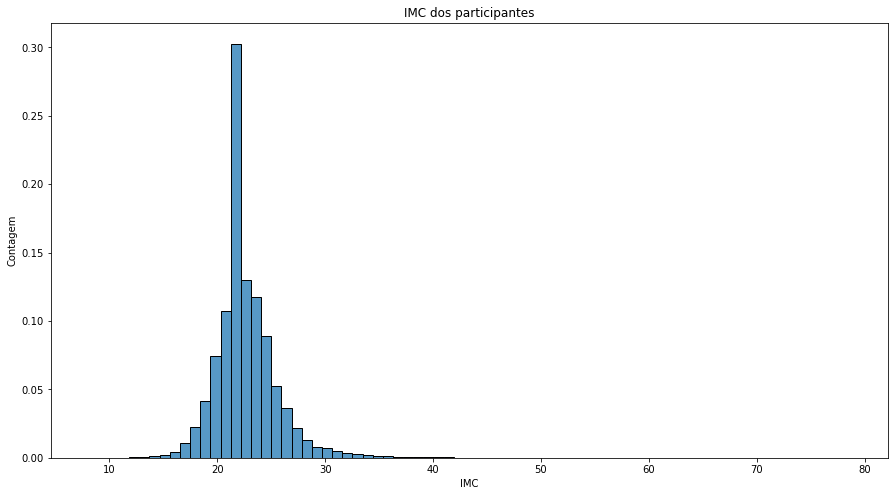

In [202]:
plt.figure(figsize=(15,8))

sns.histplot(data=data, x='IMC', bins=75, stat='density')

plt.title('IMC dos participantes')
plt.ylabel('Contagem')
plt.show()

In [203]:
# IMC podem ser resumidos (grosseiramente) nas seguintes categorias:
cat = ['Abaixo do peso', 'Peso ideal', 'Acima do peso', 'Obeso']
intervalos = [0,18.5, 24.9, 29.9, float('inf')]

# Criando nova coluna 'Categoria_IMC':
data['IMC_cat'] = pd.cut(data['IMC'], bins=intervalos, labels=cat, right=False)

data['IMC_cat']

0            Peso ideal
1            Peso ideal
2            Peso ideal
3                 Obeso
4            Peso ideal
              ...      
271111    Acima do peso
271112       Peso ideal
271113       Peso ideal
271114    Acima do peso
271115    Acima do peso
Name: IMC_cat, Length: 271116, dtype: category
Categories (4, object): ['Abaixo do peso' < 'Peso ideal' < 'Acima do peso' < 'Obeso']

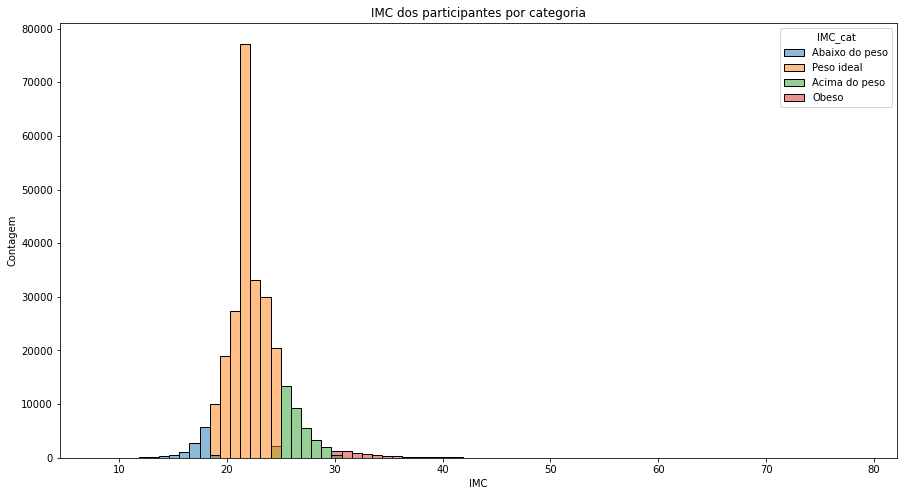

80.11% dos atletas estão no peso ideal.


In [204]:
# Podemos incrementar a visualização de dados anterior discriminando intervalos de interesse:

plt.figure(figsize=(15,8))

sns.histplot(data=data, x='IMC', hue='IMC_cat', bins=75)

plt.title('IMC dos participantes por categoria')
plt.ylabel('Contagem')
plt.show()

p_ideal = data['IMC_cat'].value_counts()['Peso ideal']/data.shape[0]*100
print(f'{round(p_ideal,2)}% dos atletas estão no peso ideal.')

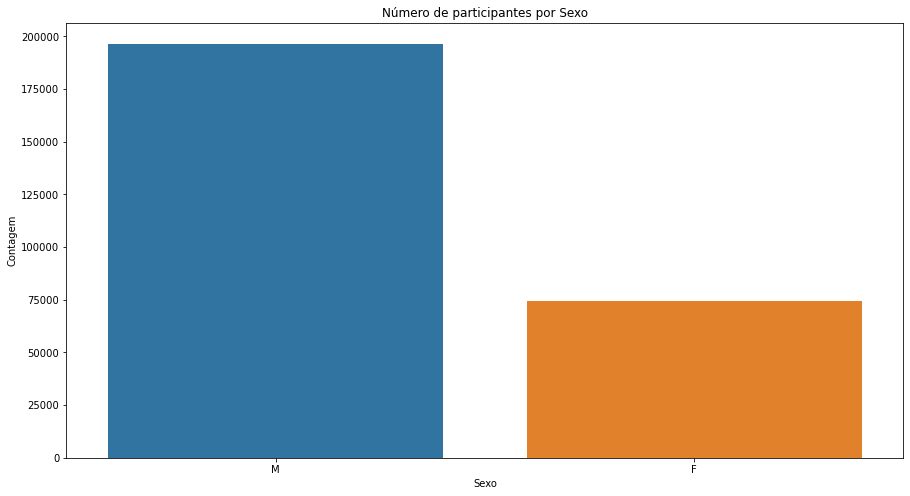

Os registros do dataset são de 72.51% atletas masculinos e 27.49% de atletas femininas.


In [205]:
# Proporção de atletas masculinos e femininas:

plt.figure(figsize=(15,8))

sns.countplot(data=data, x='Sex')

plt.title('Número de participantes por Sexo')
plt.ylabel('Contagem')
plt.xlabel('Sexo')
plt.show()

M_porc = data.loc[data['Sex']=='M'].shape[0]/data.shape[0]*100
F_porc = data.loc[data['Sex']=='F'].shape[0]/data.shape[0]*100

print(f'Os registros do dataset são de {round(M_porc,2)}% atletas masculinos e {round(F_porc,2)}% de atletas femininas.')


In [206]:
# Esta diferença de distribuição entre o número atletas masculinos e femininas se alterou com o tempo:

contagens = data.groupby(['Year', 'Sex']).size().reset_index(name='Contagem')
contagens.head()

,Year,Sex,Contagem
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285


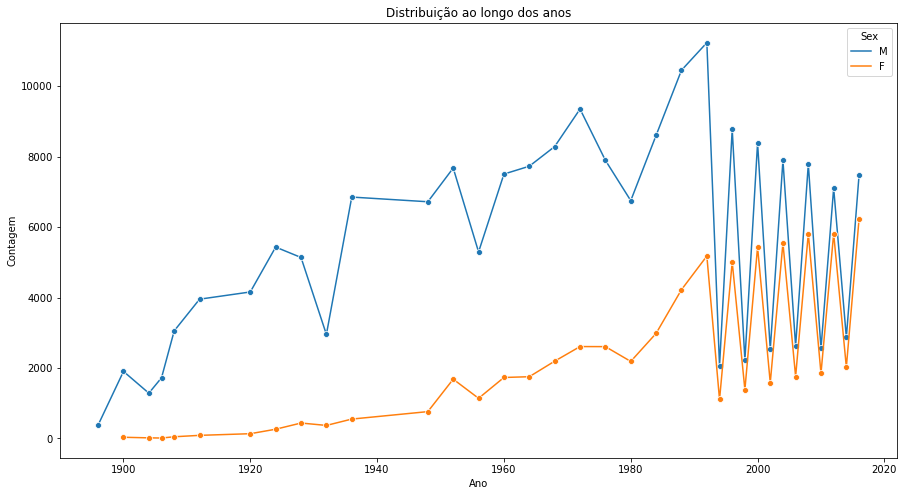

É possível observar que a partir dos anos 90 a discrepância entre atletas de sexos diferentes diminuiu consideravelmente


In [207]:
plt.figure(figsize=(15,8))

sns.lineplot(data=contagens, x='Year', y='Contagem', hue='Sex', marker='o')

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Distribuição ao longo dos anos')
plt.show()

print('É possível observar que a partir dos anos 90 a discrepância entre atletas de sexos diferentes diminuiu consideravelmente')


In [208]:
# Podemos visualizar os esportes com mais entradas no dataset:

Sports_cont = data['Sport'].value_counts()

Sports_df = Sports_cont.reset_index()
Sports_df.columns = ['Sport', 'Contagem']

print(Sports_df)

            Sport  Contagem
0       Athletics     38624
1      Gymnastics     26707
2        Swimming     23195
3        Shooting     11448
4         Cycling     10859
..            ...       ...
61       Racquets        12
62   Jeu De Paume        11
63          Roque         4
64  Basque Pelota         2
65    Aeronautics         1

[66 rows x 2 columns]


In [209]:
# Selecionando os esportes com mais de 6500 entradas no dataset:

df = Sports_df[Sports_df['Contagem']>6500]

df

,Sport,Contagem
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10859
5,Fencing,10735
6,Rowing,10595
7,Cross Country Skiing,9133
8,Alpine Skiing,8829
9,Wrestling,7154


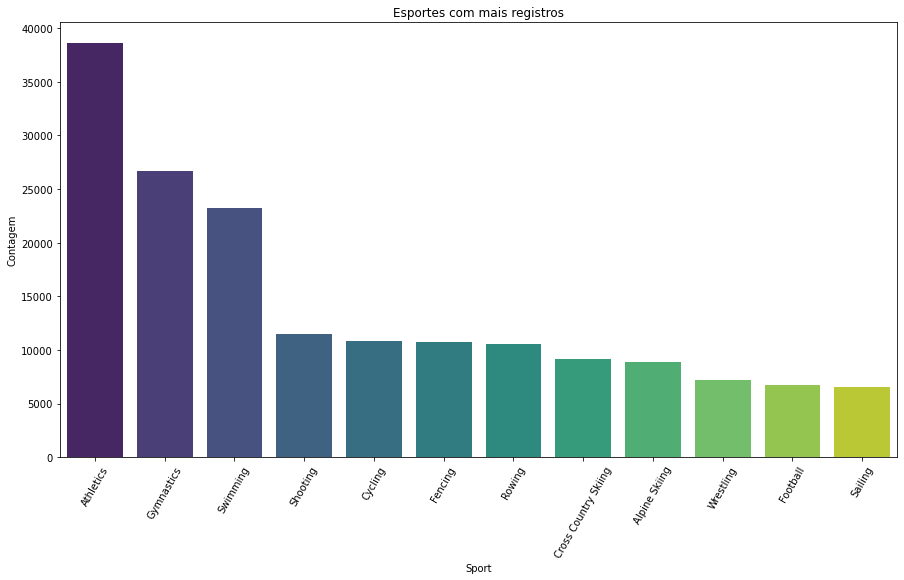

Atletismo, Ginástica e Natação são os esportes com mais entradas no dataset.


In [210]:
# Visualizando em um gráfico de barras:

plt.figure(figsize=(15,8))

sns.barplot(data=df, x='Sport', y='Contagem', palette='viridis')

plt.ylabel('Contagem')
plt.title('Esportes com mais registros')
plt.xticks(rotation=60)
plt.show()

print('Atletismo, Ginástica e Natação são os esportes com mais entradas no dataset.')

In [211]:
# Podemos visualizar o crescimento de cada esporte ao longo dos anos:

contagens_esp = data.groupby(['Year', 'Sport']).size().reset_index(name='Contagem')
contagens_esp.head()

,Year,Sport,Contagem
0,1896,Athletics,106
1,1896,Cycling,41
2,1896,Fencing,15
3,1896,Gymnastics,97
4,1896,Shooting,65


In [212]:
# Utilizando o dataset "df" para selecionar apenas os esportes com mais entradas no dataset anterior:

lista_esp = df['Sport'].unique()

print(lista_esp)

['Athletics' 'Gymnastics' 'Swimming' 'Shooting' 'Cycling' 'Fencing'
 'Rowing' 'Cross Country Skiing' 'Alpine Skiing' 'Wrestling' 'Football'
 'Sailing']


In [213]:
contagens_esp_filtrado = contagens_esp[contagens_esp['Sport'].isin(lista_esp)]

contagens_esp_filtrado.head()

,Year,Sport,Contagem
0,1896,Athletics,106
1,1896,Cycling,41
2,1896,Fencing,15
3,1896,Gymnastics,97
4,1896,Shooting,65


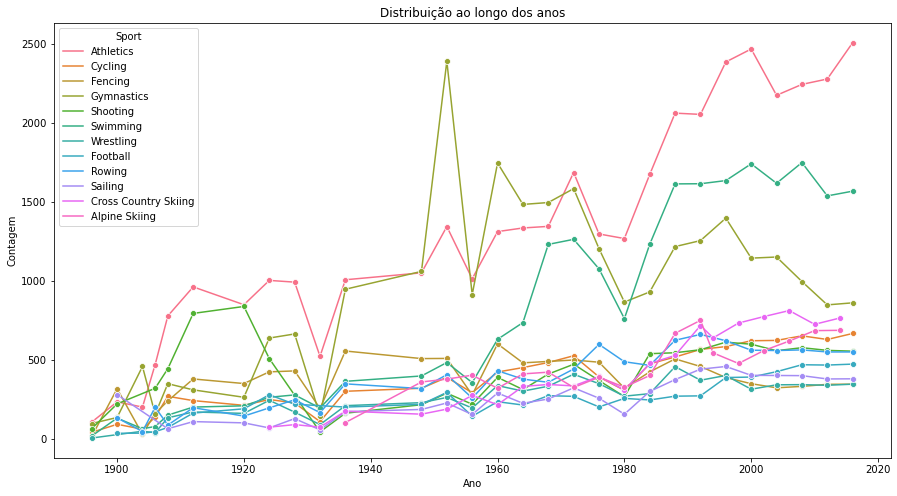

In [214]:
# Agora, visualizamos o número de entradas de cada esporte ao longo dos anos:

plt.figure(figsize=(15,8))

sns.lineplot(data=contagens_esp_filtrado, x='Year', y='Contagem', hue='Sport', marker='o')

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Distribuição ao longo dos anos')

plt.show()

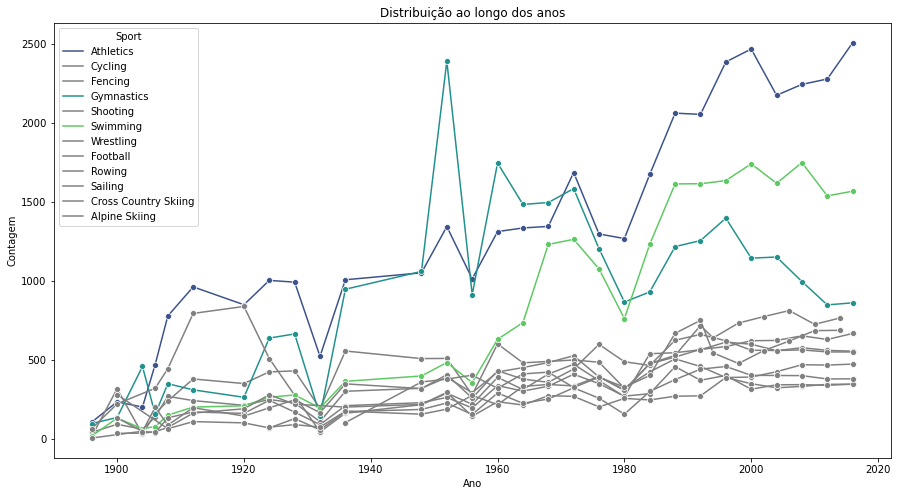

In [215]:
# Se estivermos interessados em, por exemplo, apenas o 3 esportes com mais entradas
# podemos discrimina-los dos outros esportes no gráfico:

plt.figure(figsize=(15,8))

list = ['Athletics', 'Gymnastics', 'Swimming']
cores_unicas = sns.color_palette('viridis', n_colors=len(list))

#cor ={x:'green' if x in list else 'grey' for x in contagens_esp_filtrado['Sport'].unique()}
# código acima da cor diferente para as linhas da lista.

map_cor = {esporte: cor for esporte, cor in zip(list, cores_unicas)}
for esporte in lista_esp:
    if esporte not in map_cor:
        map_cor[esporte] = 'grey'


sns.lineplot(data=contagens_esp_filtrado, x='Year', y='Contagem', hue='Sport', marker='o', palette=map_cor)

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Distribuição ao longo dos anos')

plt.show()